In [1]:
%load_ext autoreload
%autoreload 2
import sys
import lightgbm as lgb
sys.path.append('../')
from data import create_training_data, create_evaluation_data2, create_large_training_data
from pipeline import run_model_training, run_hyperparameter_tuning, run_model_training_quick, run_predictions

In [29]:
test_gw = 4

In [3]:
big_df = create_large_training_data()

create large training data version 0.2
season added is: 2020-21, in UTF-8!
season added is: 2019-20, in UTF-8!
season added is: 2018-19, in other!
season added is: 2017-18, in other!
season added is: 2016-17, in other!
Creating shifted time-series features
training set made!


In [4]:
#df = create_training_data("2020-21")
eval_df = create_evaluation_data2(session="test", gameweek_to_evaluate=test_gw)

test data version 0.4
current_gw to get data test for is 5


In [5]:
eval_df

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,event_points
0,Cédric,0.0,0,43,0.000000,0.0,0.0,0
1,Xhaka,4.5,9,50,89.250000,-2.1,-16.0,2
2,Elneny,0.8,15,44,22.500000,0.8,15.0,0
3,Holding,0.0,3,43,0.250000,0.0,3.0,1
4,Partey,0.0,0,50,67.500000,-1.7,-13.0,0
...,...,...,...,...,...,...,...,...
598,Hodge,0.0,0,45,0.000000,0.0,0.0,0
599,Ronan,0.0,0,45,0.000000,0.0,0.0,0
600,Campbell,0.0,0,45,1.250000,0.0,0.0,0
601,Guedes,5.0,21,60,64.666667,-3.3,15.0,3


In [ ]:
best_hyperparams = run_hyperparameter_tuning(big_df)

In [6]:
import pickle
params = pickle.load(open("parameters_2021_28_10_18_55.pkl",'rb'))

In [12]:
params

{'n_estimators': 10000,
 'learning_rate': 0.05,
 'num_leaves': 255,
 'max_depth': 12,
 'min_data_in_leaf': 80,
 'max_bin': 200,
 'lambda_l1': 35,
 'lambda_l2': 10,
 'min_gain_to_split': 1.786357723256773,
 'bagging_fraction': 0.6000000000000001,
 'bagging_freq': 1,
 'feature_fraction': 0.7}

In [7]:
model = run_model_training(params, big_df)

c:\Users\magnu\AppData\Local\Programs\Python\Python37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 324364, number of used features: 6
[LightGBM] [Info] Start training from score 1.293229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's l2: 5.65471	valid_1's l2: 5.76394
Training until validation scores don't improve for 5000 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's l2: 5.18209	valid_1's l2: 5.28289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's l2: 4.87917	valid_1's l2: 4.97471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's l2: 4.60879	valid_1's l2: 4.6991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	training's l2: 4.23

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

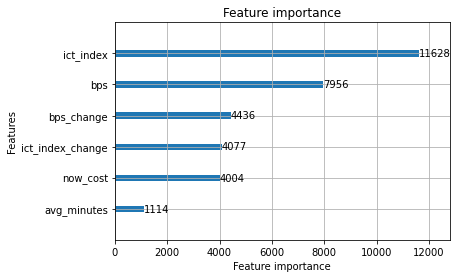

In [8]:
lgb.plot_importance(model[0])

In [9]:
used_features =  ['name','ict_index', 'bps', 'now_cost','avg_minutes', 'ict_index_change', 'bps_change']

In [19]:
eval_df

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,event_points
0,Leno,0.0,0,47,33.75,0.0,0.0,0
1,Rúnarsson,0.0,0,40,0.00,0.0,0.0,0
2,Willian,0.0,0,63,0.00,0.0,0.0,0
3,Aubameyang,9.1,33,99,64.75,5.1,28.0,6
4,Cédric,0.0,0,43,23.50,0.0,0.0,0
...,...,...,...,...,...,...,...,...
612,Cundle,0.0,0,45,0.00,0.0,0.0,0
613,Campbell,0.0,0,45,0.00,0.0,0.0,0
614,Marques,0.0,0,40,0.00,0.0,0.0,0
615,Hwang,1.9,-1,56,67.20,-11.4,-62.0,8


In [20]:
big_df

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,event_points
0,Aaron Connolly,3.4,-3,55,9.000000,0.0,0.0,1.0
1,Aaron Connolly,3.4,-3,55,90.000000,0.0,0.0,1.0
2,Aaron Connolly,3.4,-3,55,0.000000,0.0,0.0,1.0
3,Aaron Connolly,6.9,27,55,67.000000,3.5,30.0,1.0
4,Aaron Connolly,6.9,27,55,0.000000,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...
405451,Ørjan_Nyland_27,0.0,0,43,90.000000,0.0,0.0,0.0
405452,Ørjan_Nyland_27,0.0,0,43,7.000000,0.0,0.0,0.0
405453,Ørjan_Nyland_27,0.0,0,43,12.416667,0.0,0.0,0.0
405454,Ørjan_Nyland_27,0.0,0,43,90.000000,0.0,0.0,0.0


In [30]:
preds = run_predictions(eval_df, "model_2022_17_09_15_11.pkl", session = "test", test_gw=test_gw, used_features=used_features)

Saving model...


In [31]:
preds.sort_values(by=["predicted_points"], ascending=False).head(n = 50)

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,predicted_points,actual_gw_points,round
0,Adams,7.9,6,64,71.375000,-2.4,-47.0,14.712702,2,4
1,Adams,7.9,6,64,71.375000,-2.4,-47.0,14.712702,2,4
2,Adams,7.9,6,64,71.375000,-2.4,-47.0,14.712702,2,4
3,Adams,7.9,6,64,71.375000,-2.4,-47.0,14.712702,2,4
4,Saint-Maximin,11.2,22,65,85.750000,-2.3,-21.0,13.065048,9,4
5,Bernardo,15.4,37,68,54.250000,2.0,-9.0,12.380445,9,4
6,Harrison,3.8,7,60,82.000000,-9.7,-36.0,12.145067,2,4
7,Ødegaard,13.8,37,65,85.750000,1.8,-10.0,11.605845,10,4
8,Zaha,0.0,0,71,65.250000,-15.8,-39.0,11.411237,0,4
9,Saliba,4.3,28,46,90.000000,-2.5,-11.0,10.753899,7,4


In [22]:
import seaborn as sns
import numpy as np

In [28]:
np.percentile(preds["actual_gw_points"], 95)

7.0

In [27]:
preds.sort_values(by=["actual_gw_points"], ascending=False).head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,predicted_points,actual_gw_points,round
85,Firmino,30.4,81,80,52.000000,24.7,69.0,3.288857,22,4
53,Haaland,19.4,73,117,80.750000,6.9,45.0,5.957586,17,4
88,Alexander-Arnold,13.2,58,75,88.000000,7.0,46.0,2.929064,17,4
302,Sterling,13.1,39,99,83.250000,11.0,40.0,0.542406,15,4
145,Luis Díaz,15.7,52,80,86.750000,10.3,56.0,1.787611,14,4
96,Van Dijk,9.6,40,65,90.000000,7.4,26.0,2.548947,12,4
59,Groß,10.7,40,57,90.000000,3.5,16.0,5.533677,11,4
208,Fornals,7.6,30,54,77.250000,5.7,23.0,1.344437,11,4
197,Dalot,8.1,35,44,88.750000,3.0,23.0,1.393370,11,4
7,Ødegaard,13.8,37,65,85.750000,1.8,-10.0,11.605845,10,4


In [11]:
preds.head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,predicted_points,actual_gw_points,round
0,Alexander-Arnold,13.3,24,75,90.000000,-4.9,-26.0,13.844529,12,4
1,Antonio,21.2,46,78,89.333333,0.6,-21.0,13.524052,-1,4
2,Lukaku,7.1,6,115,60.000000,-13.6,-27.0,12.641775,13,4
3,Benrahma,4.7,10,63,88.000000,-7.0,-33.0,12.073288,3,4
4,Duffy,2.9,14,41,90.000000,-8.5,-23.0,11.243941,5,4
5,Tsimikas,1.8,4,42,61.333333,-8.1,-37.0,11.091711,0,4
6,Laporte,7.7,23,55,60.000000,-0.4,-15.0,10.309993,5,4
7,Rice,5.4,11,50,90.000000,-2.3,-23.0,9.834561,2,4
8,Klich,0.0,0,55,49.666667,-10.2,-28.0,9.808517,0,4
9,Mings,0.0,0,50,60.000000,-8.3,-47.0,9.756328,0,4
